---
title: "Analyzing the Historical Voter Turnout for Primary Elections in Philadelphia"
author: "Richard Barad"
date: "2023-12-14"
categories: [Politics, Python]
format: 
  html:
    toc: true
    code-fold: true
    fontsize: 11pt
execute:
  echo: true
---

## Overview

This analysis was completed as part of a my python course at the University of Pennslyvania. The assignment required us to explore a dataset from the Open Philadelphia data portal and produce charts using matplotlib, altair, and seaborn. 

Prior to making the charts, I had to clean the data and merge together data from multiple different election cycles. In this homework assignment I also discuss some of the advantages and disadvantages of Altair, Matplotlib, and seaborn.

## Import Libraries and Read Data

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
import os
import seaborn as sns

path =  './/Data'

files = os.listdir(path)

df_list =[]

for f in files:
    df_list.append(pd.read_csv('.//Data//' + f))

vote_data = pd.concat(df_list)

## Clean Data

In [25]:
#Shorten election field to contain just the four digit year to make visuals cleaner

vote_data['election'] = vote_data['election'].str[:5]

In [26]:
#Group all voters who are not democrat or Republican into an Other group and aggregate other group together

major_party = vote_data['political_party'].isin(['DEMOCRATIC','REPUBLICAN'])
vote_data.loc[~major_party,'political_party'] = 'OTHER'
vote_data = vote_data.groupby(['precinct_code','precinct_description','election','political_party'],as_index=False)['voter_count'].sum()
vote_data.head()

precinct_code precinct_description election political_party  voter_count
0            101   PHILA WD 01 DIV 01    2015       DEMOCRATIC          157
1            101   PHILA WD 01 DIV 01    2015            OTHER            7
2            101   PHILA WD 01 DIV 01    2015       REPUBLICAN            3
3            101   PHILA WD 01 DIV 01    2016       DEMOCRATIC          207
4            101   PHILA WD 01 DIV 01    2016            OTHER           13

## Matplotlib - Total Voter Turnout in Primary Elections in Philadelphia

I used matplotlib for this graph because matplotlib seems best suited for creating simple visulizations like bar graphs. Creating a bar graph using Matplotlib requires minimal code. For more complex visulizations like scatter plots, stacked bar graphs, and heatmaps another library would allow us to make the visulizations with less code.


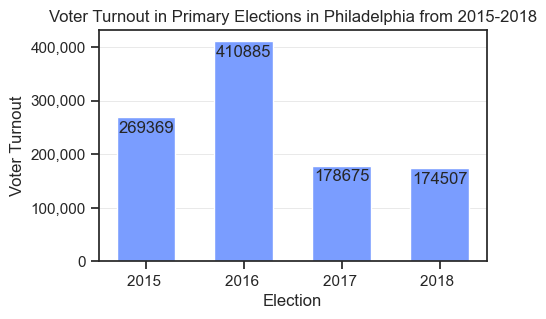

In [27]:
#Calculate total turnout per year

turnout = vote_data.groupby('election',as_index=False)['voter_count'].sum()

from matplotlib import ticker

fig, ax = plt.subplots(figsize=(5, 3))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]-29000,y[i],ha = 'center')
        
ax.bar(turnout['election'],turnout['voter_count'],width=0.6,color='#7a9dff')

ax.set_ylabel('Voter Turnout')
ax.set_xlabel('Election')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.grid(visible = 'True',linewidth=0.5,color='#e0e0e0')
ax.set_axisbelow(True)

addlabels(turnout['election'],turnout['voter_count'])

plt.title('Voter Turnout in Primary Elections in Philadelphia from 2015-2018')
plt.show()

The matplotlib graph shows total voter turnout in each primary election from 2015-2018. From the graph we can observe that primary turnout is highest in 2016 which was the year of a presidential election. The second highest primary turnout was in 2015 which was the year of a mayoral election. 


## Make Boxplot Chart using Seaborn

This chart is a boxplot which shows the distribution of the number of voters by precinct from 2015 to 2018 in primary elections. Boxplots are included for both
Democrats and Republicans primaries. The middle line in the box represents the median value, the top of the box represents the upper quartile (Q3), while
the bottom of the box represents the lower quartile (Q1) - in other words 50% of the data points are located within the box. The whiskers extending from the box extend to the minimum and maximum values for the number of voters. I used seaborn for this visulization because Seaborn library is designed for creating statistical diagrams like boxplots. 

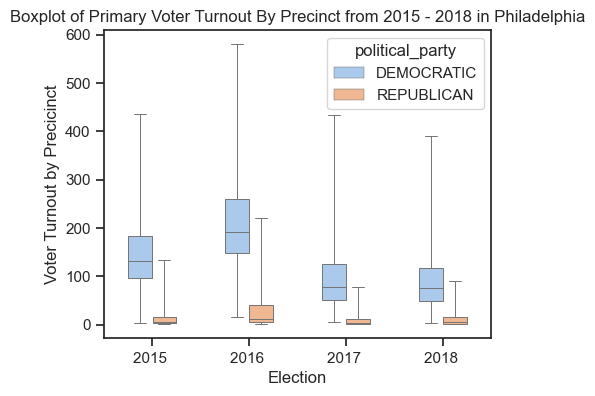

In [28]:
# Filter to just registered Democratic and Republican Voters
major_party = vote_data['political_party'].isin(['DEMOCRATIC','REPUBLICAN'])
vote_data_major_party = vote_data.loc[major_party]

fig, ax = plt.subplots(figsize=(5, 4))

sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
box_plot = sns.boxplot(data=vote_data_major_party,
                       x="election", 
                       y="voter_count",
                       hue="political_party",
                       whis=(0,100),
                       width=0.5,
                      linewidth=0.7)

ax.set_ylabel('Voter Turnout by Precicinct')
ax.set_xlabel('Election')
plt.title('Boxplot of Primary Voter Turnout By Precinct from 2015 - 2018 in Philadelphia')
plt.show()

The boxplots show that this a wide variation in the number of voters voting in each precinct. This could be because the number of people living in each precinct is variable or it could also be caused by variable turnout across the precincts. Across all years, the number of voters voting in Democratic pimary elections in Philadelphia is much higher than the number of voters voting in Republican elections. The median voter turnout was highest in the 2016 primary for both Democrats and Republicans. For Democrats, the value for the first/lower quartile (Q1), is higher than the value of the third/upper quartile (Q3) in 2017 and 2018 indicating a large jump in voter turnout in 2016 durring the presidential election year.

## Altair Visualizations

### Altair Chart 1 - Percent of Total Primary Voters by Political Party

In [29]:
alt.data_transformers.disable_max_rows()
source = vote_data

alt.Chart(source).transform_aggregate(
    total1='sum(voter_count)',
    groupby=['election', 'political_party']
).transform_joinaggregate(
    total2='sum(total1)',
    groupby=['election']  
).transform_calculate(
    frac=alt.datum.total1 / alt.datum.total2
).mark_bar().encode(
    x=alt.X('total1:Q').stack("normalize").title('Percent of Total Voters'),
    y='election',
    color='political_party',
    tooltip=[alt.Tooltip('political_party', title='Poltical Party'),
             alt.Tooltip('total1:Q', title='Number of Voters', format=',.0f'),
             alt.Tooltip('frac:Q', title='Percent of Voters', format='.0%')
            ]
).properties(height=alt.Step(30),title='Percent of total Voters voting in each primary election')

alt.Chart(...)

This chart shows the percent of total voters voting in democratic, republican, and other primaries from 2015 to 2018. The charts indicates that from 2015-2018 between 90 and 85% of voters in Philadelphia voted in the democratic primary. Between 7 and 12% of primary voters voted in the republican primary. The percent of primary voters who voted in the republican primary is highest in 2016 when 12 percent of voteres voted in the Republican primary. Based on previous graphs, we know that both democratic and republican turnout increased in 2016. This graph shows us that the percent increase in turnout in 2016 was higher for the Republican party. We know this becase the percentage of total voters who are Democrats declined in 2016 despite the increase in democratic turnout.

### Altair Chart 2 - Total Voter Turnout in Primary Elections

In [30]:
alt.data_transformers.disable_max_rows()
source = vote_data

alt.Chart(source).mark_bar().encode(
    x='election',
    y=alt.Y('sum(voter_count)').title('Number of Voters'),
    color='political_party',
    tooltip=[alt.Tooltip('political_party', title='Poltical Party'),
             alt.Tooltip('sum(voter_count)', title='Number of Voters', format=',.0f')
            ]
).properties(width=alt.Step(90),title='Voter Turnout from 2015-2018 in Primary Elections')

alt.Chart(...)

This chart show voter turnout by party from 2015 to 2018 in primary elections. For both of the major parties, turnout was highest in 2016 which was the year of the presidential election. The second highest turnout year was 2015, which was the year of a mayoral election. Total turnout was similar for the 2017 and 2018 primaries. However, the democratic party had higher turnout in 2017 than 2018. Conversely, republican turnout was higher in 2018 than 2017.   

### Altair Chart 3 - Percent of Voters Voting as Democrats and Republicans by Ward

#### Data Processing

In [31]:
# Calculate Number of Voters by Ward for each election / political party combination.

vote_data['Ward'] = vote_data['precinct_description'].str[6:11]
vote_data_ward = vote_data.groupby(['Ward','election','political_party'],as_index=False)['voter_count'].sum()

# Calculate Percent of Residents in each ward voting for each party by election

vote_data_total = vote_data_ward.groupby(['Ward','election'],as_index=False)['voter_count'].sum()
vote_data_total.rename({'voter_count':'total_votes'},axis=1,inplace=True)

vote_w_total = vote_data_ward.merge(vote_data_total,on=['Ward','election'])
vote_w_total['pct'] = (vote_w_total['voter_count'] / vote_w_total['total_votes'])

#Pivot Data

vote_w_total_pivot = vote_w_total.pivot(index=['Ward','election','total_votes'],columns='political_party',values='pct').reset_index()
vote_w_total_pivot.head()

political_party   Ward election  total_votes  DEMOCRATIC     OTHER  REPUBLICAN
0                WD 01    2015          3848    0.901767  0.041580    0.056653
1                WD 01    2016          5661    0.869988  0.036566    0.093446
2                WD 01    2017          3358    0.911257  0.040203    0.048541
3                WD 01    2018          3704    0.904698  0.029428    0.065875
4                WD 02    2015          5540    0.901444  0.041516    0.057040

#### Make Chart

In [32]:
brush = alt.selection_interval()

(
    alt.Chart(vote_w_total_pivot).transform_calculate(
    x='datum.DEMOCRATIC * 100',
    y='datum.REPUBLICAN * 100'
).mark_point()
    .encode(
        x=alt.X("x:Q", scale=alt.Scale(zero=True),title='Percent Voting as Democrat'),
        y=alt.Y("y:Q", scale=alt.Scale(zero=True,domainMax=50),title='Percent Voting in Republican'),
        color=alt.condition(brush, "election:N", alt.value("lightgray")),
        tooltip=[alt.Tooltip('Ward',title='Ward'),
                 alt.Tooltip('total_votes',title='Total Turnout'),
                 alt.Tooltip('DEMOCRATIC', title="% of Voters Voting in Democratic Primary",format='.2%'), 
                 alt.Tooltip('REPUBLICAN', title="% of Voters Voting in Republican Primary",format='.2%')]
    )
    .properties(width=200, height=200)
    .facet(column="election")
    .add_params(brush)
)

alt.FacetChart(...)

These charts show the percent of voters by Ward voting in the democratic primary and the republican primary. Across all wards in Philadelphia more than 50 percent of voters voted in the Democratic primary. This pattern holds true across all four of the analyzed election years. In most wards, more than 80 percent of voters voted in the democratic primary. There are several wards were the percentage of voters who vote in republican primaries is consistently high compared to the rest of the city - this includes Wards 66, 64, 63 and 45. In all four of the wards listed the percentage of voters voting in the republican primary is greater than 25 percent in all four of the analyzed election years.

#### Altair Chart Four - Two Chart Dashboard

This altair dashboard includes a heatmap and a scatter plot. To use the dashboard, click on any box in the heat map. All points in the scatter plot will turn grey excepte for the selected point. You can hold down shift on your keyboard to select multiple points. For example, a user might want to select all data points for one ward to see what percent of Voters Voted in the Democratic Primary in the ward they level in. For example a user could select the four data points for Ward 66 in the heat map and see that Ward 66 has the lowest percentage of voters voting in democratic primary across the city. 


In [36]:
selection = alt.selection_point()

points = (
    alt.Chart().transform_calculate(
    x='datum.DEMOCRATIC * 100'
)
    .mark_point()
    .encode(
        x=alt.X("total_votes:Q", scale=alt.Scale(zero=True),title='Number of Voters'),
        y=alt.Y("x:Q", scale=alt.Scale(zero=True), title='Percent of Voters Voting in Democratic Primary'),
        color=alt.condition(selection,"election:N",alt.value("lightgray")),
        tooltip=[alt.Tooltip('Ward',title='Ward'),
                 alt.Tooltip('election',title='Election Year'),
                 alt.Tooltip('total_votes',title='Total Turnout'),
                 alt.Tooltip('DEMOCRATIC', title="% of Voters Voting in Democratic Primary",format='.0%'), 
                 alt.Tooltip('REPUBLICAN', title="% of Voters Voting in Republican Primary",format='.0%')]
    )
    .properties(width=650, height=400)
)

heatmap = (
    alt.Chart()
    .mark_rect()
    .encode(
    x='Ward:O',
    y='election:O',
    color='total_votes:Q',
    opacity=alt.condition(selection,'1',alt.value(0.2))
    )
    .add_params(selection)
    .properties(width=650)
)

chart = alt.vconcat(points, heatmap, data=vote_w_total_pivot)

chart

alt.VConcatChart(...)